In [1]:
import cv2
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# LOAD IMAGES FOR PREVIEW
img_empty = cv2.imread("C:/Users/caram/Documents/2024-08-21-Messungen/2024-08-21-Empty/01_100KV_1200MUA.TIFF",cv2.IMREAD_UNCHANGED)
img_mouse = cv2.imread("C:/Users/caram/Documents/2024-08-21-Messungen/2024-08-21-Maus/01_100KV_1200MUA.TIFF",cv2.IMREAD_UNCHANGED)

In [3]:
cv2.imshow('TIFF Image', img_empty)
cv2.waitKey(0)
cv2.destroyAllWindows()

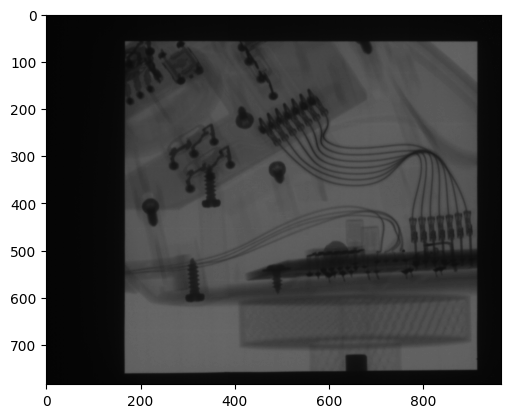

In [3]:
plt.imshow(img_mouse, cmap='grey')

In [4]:
np.max(img_empty[100:400,200:600])

33900

In [5]:
np.min(img_empty[100:400,200:600])

33638

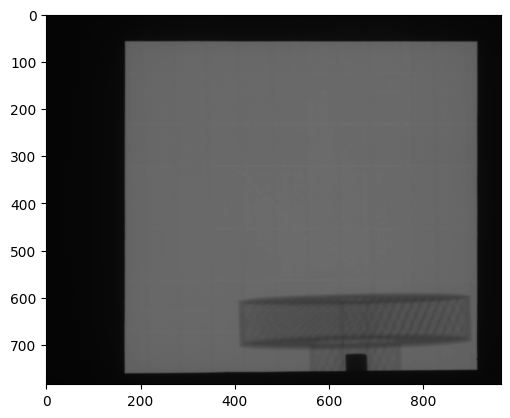

In [6]:
plt.imshow(img_empty, cmap="grey")

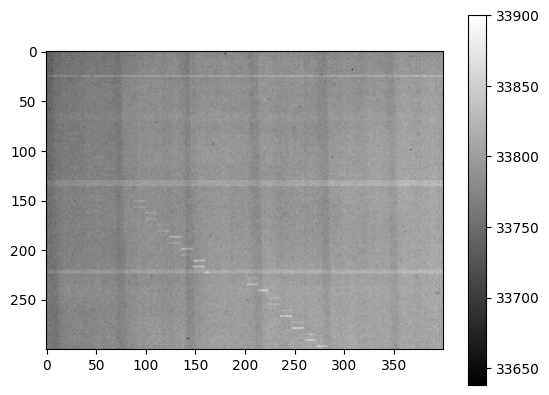

In [7]:
plt.imshow(img_empty[100:400,200:600], cmap="grey")
plt.colorbar()

In [8]:
_img_empty = cv2.imread("C:/Users/caram/Documents/2024-08-21-Messungen/2024-08-21-Mandarine-100kV-1200muA/000.TIFF",cv2.IMREAD_UNCHANGED)
test_img_empty_ftcorr = _img_empty/img_empty

In [26]:
ecke = _img_empty[0:20,0:20]
ecke = np.mean(ecke)

In [28]:
_img_empty_norm = _img_empty/ecke

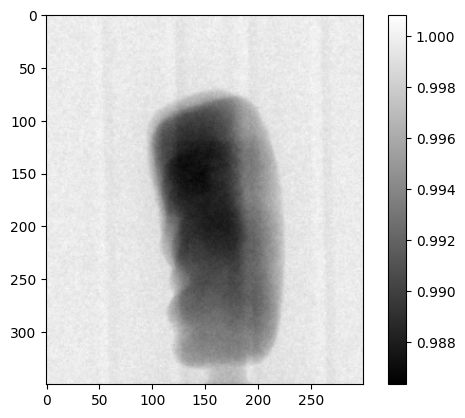

In [9]:
plt.imshow(test_img_empty_ftcorr[200:550,500:800], cmap='grey')
plt.colorbar()

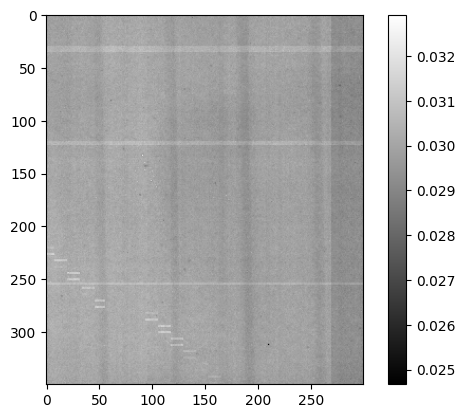

In [32]:
plt.imshow(np.abs(test_img_empty_ftcorr[200:550,500:800] - _img_empty_norm[200:550,500:800]), cmap='grey')
plt.colorbar()

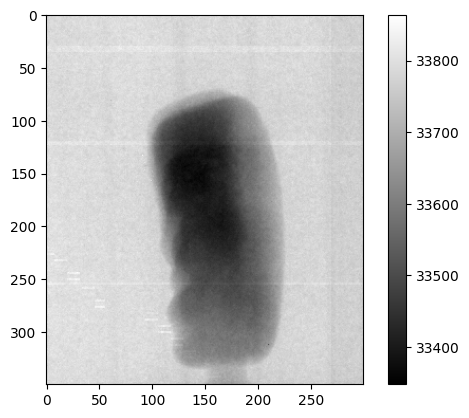

In [25]:
plt.imshow(_img_empty[200:550,500:800]/max(), cmap='grey')
plt.colorbar()

In [24]:
folder_path = "C:/Users/caram/Documents/2024-08-21-Messungen/2024-08-21-Mandarine-100kV-1200muA/"

tiff_files = sorted(glob.glob(os.path.join(folder_path, '*.TIFF')))
if not tiff_files:
    print("Empty or no TIFF")
else:
    first_image = cv2.imread(tiff_files[0],cv2.IMREAD_UNCHANGED)
    
    if first_image is None:
        print(f"Failed to read first file: {tiff_files[0]}")
    else:
        height,width = first_image.shape[:2]
        num_images = len(tiff_files)
        
        Z = np.zeros((height,width,num_images))
    
        for i, file_path in enumerate(tiff_files):
            image = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)
            
            if image is None:
                print(f"Failed to read {file_path}")
            else:
                Z[:, :, i] = image  # Store the image in the 3D array at index i
        
        # Display final information
        print(f"Stored {num_images} images in the 3D array Z with shape: {Z.shape}")

Stored 100 images in the 3D array Z with shape: (784, 964, 100)


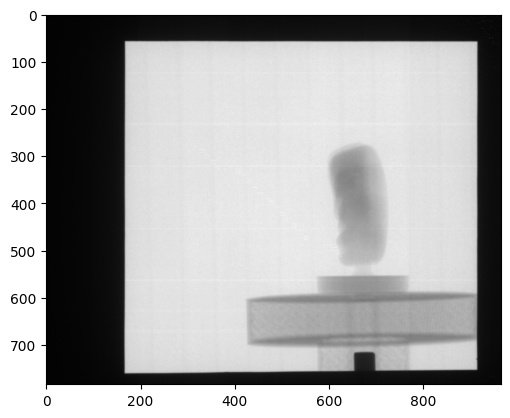

In [28]:
plt.imshow(Z[:,:,0], cmap='grey')

KeyboardInterrupt: 

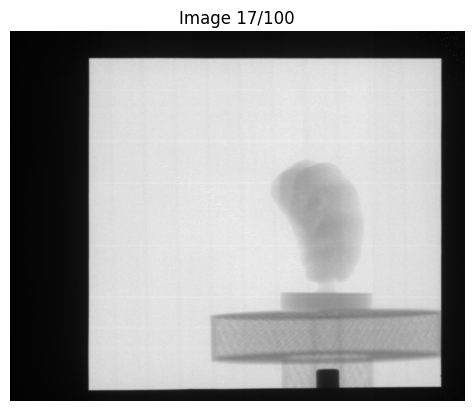

: 

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, clear_output
import time

# Function to display each image from the Z array
def display_images(Z):
    num_images = Z.shape[2]  # Number of images in the 3D array
    
    for i in range(num_images):
        # Clear previous output (clears the previous image from Jupyter's output cell)
        clear_output(wait=True)
        
        # Display the image from the Z array
        plt.imshow(Z[:, :, i], cmap='gray')  # Assuming grayscale images; adjust cmap if needed
        plt.title(f"Image {i+1}/{num_images}")
        plt.axis('off')  # Hide axes
        
        # Show the plot and update the Jupyter output
        display(plt.gcf())  # Get the current figure and display it
        
        # Pause for 1 second between images (adjust as necessary)
        # time.sleep(0.005)
    
    # Clear the final output after the loop is done
    clear_output(wait=True)

# Call the function to display all images
display_images(Z)
